In [1]:
import pandas as pd
import numpy as np
from netCDF4 import Dataset
import rasterio as rs
from affine import Affine
from pyproj import Proj,transform

In [2]:
# define the file paths:
patch = '/Volumes/data/RHESSys_out/Como/out/exp/spatial/PGW_LP_1_2000_0_CLC_CP_CT_1_patch.daily' # patch output
raster = './data/como_patch.tiff' # patch index map

In [3]:
# first read in the patch map and create the spatial information
with rs.open(raster) as ds:
    T0 = ds.affine # upper left pixel corner affine transform
    A = ds.read(1) # get pixel values
    cs = T0[0] # get cell size
    noData = ds.nodata
    A = np.array(A,dtype=np.float64)
    
# generate rows and columns
cols,rows = np.meshgrid(np.arange(A.shape[1]),np.arange(A.shape[0]))

In [4]:
p1 = Proj(ds.crs, preserve_units=True) # generate the proj4 instance for the dataset's native projection

In [5]:
T1 = T0 * Affine.translation(0.5,0.5) # get affine transform for pixel centers
rc2en = lambda r,c: (c,r) * T1 # function to convert row/col index to easting/northing at centre
eastings,northings  = np.vectorize(rc2en)(rows,cols) # create grids of cell centers

In [6]:
m,n = eastings.shape # y,x format
x = np.reshape(eastings,(m*n))
y = np.reshape(northings,(m*n))

(135, 202)


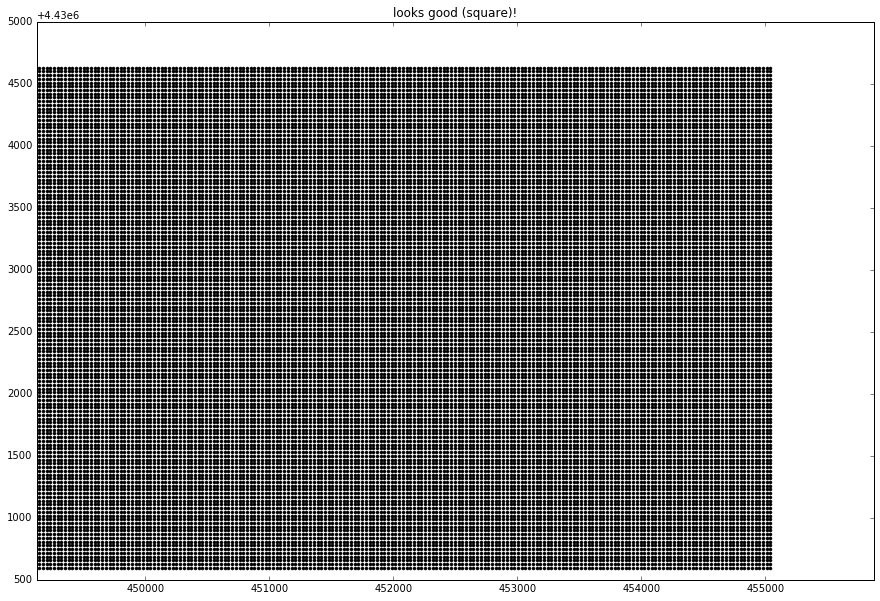

In [7]:
# check that the data are square
print(m,n)
plt.figure(figsize=(15,10));
plt.plot(x,y,'.k');
plt.axis('equal');
#plt.ylim(3500,4000);
#plt.xlim(45200,45300);
plt.title('looks good (square)!');

In [8]:
len(np.unique(A))

5545

In [9]:
n,m = A.shape

In [10]:
noData

65535.0

In [11]:
A[A==noData] = np.NaN

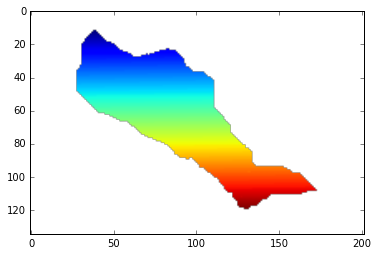

In [12]:
plt.imshow(A)

In [13]:
patches = np.reshape(A,(n*m))
patches = patches[np.isnan(patches) == 0]

In [14]:
len(patches)

5551

In [15]:
len(np.unique(patches))

5544

In [16]:
patchIDX = np.arange(0,len(patches))

In [17]:
len(patchIDX)

5551

In [2]:
# conver to datetime
def make_datetime(df):
    return '%i-%i-%i'%(df.year,df.month,df.day)

In [5]:
# Read in the patch data:
dat = pd.read_table('/Volumes/data/RHESSys_out/Como/out/exp/spatial/PGW_LP_1_2000_0_CLC_CP_CT_1_patch.daily',
                   sep = ' ',nrows=6000)

# pull out variables
header = dat.columns
names = dat.columns[7:]
datetime = dat.apply(make_datetime,axis=1)

In [6]:
header

Index([u'day', u'month', u'year', u'basinID', u'hillID', u'zoneID', u'patchID',
       u'rain_thr', u'detention_store', u'sat_def_z', u'sat_def',
       u'rz_storage', u'potential_rz_store', u'rz_field_capacity',
       u'rz_wilting_point', u'unsat_stor', u'rz_drainage', u'unsat_drain',
       u'sublimation', u'return', u'evap', u'evap_surface', u'soil_evap',
       u'snow', u'snow_melt', u'trans_sat', u'trans_unsat', u'Qin', u'Qout',
       u'psn', u'root_zone.S', u'root.depth', u'litter.rain_stor', u'litter.S',
       u'area', u'pet', u'lai', u'baseflow', u'streamflow', u'pcp',
       u'recharge', u'Kdowndirpch', u'Kdowndiffpch', u'Kupdirpch',
       u'Kupdifpch', u'Luppch', u'Kdowndirsubcan', u'Kdowndifsubcan',
       u'Ldownsubcan', u'Kstarcan', u'Kstardirsno', u'Kstardiffsno',
       u'Lstarcanopy', u'Lstarsnow', u'Lstarsoil', u'wind', u'windsnow',
       u'windzone', u'ga', u'gasnow', u'trans_reduc_perc', u'pch_field_cap',
       u'overland_flow', u'height', u'ustar', u'snow_albe

In [1]:
dat = pd.read_table('/Volumes/data/RHESSys_out/Como/out/exp/spatial/PGW_LP_1_2000_0_CLC_CP_CT_1_patch.daily',
                    sep = ' ',usecols=['day','month','year','patchID'])

In [ ]:
datetime = dat.apply(make_datetime,axis=1)

In [9]:
len(datetime)

6000

In [49]:
dat.patchID.unique().shape

(5544,)